# Ejercicio 1
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son los siguientes:

● Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH),
gavilanes colirrojos (RT) y gavilanes rastreros (SS).

● Año. Indica el año en que se avistó el ave.

● Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las
aves cazadoras para sujetar mejor a sus presas).

● Ala. Indica la longitud en milímetros de la pluma más larga del ala.

● Peso. Indica el peso del ave en gramos.

● Cola. Indica la longitud de la cola del ave en milímetros.

a) Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay
correlación/débil/fuerte) y el tipo (positiva/negativa)

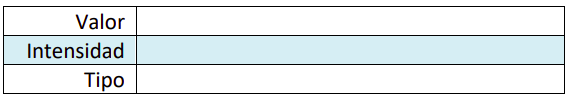

b) Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media
y desvío. 

![alt text](image-1.png)

Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:

I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.

II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.

III. Un hallux que mida más de 600 mm es considerado atípico extremo.

IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.

V. En un gavilán es atípico que su hallux mida menos de 100 mm.

In [4]:
import pandas as pd

df = pd.read_csv("csv/hawks.csv", delimiter=";", encoding="latin1")
df

,Año,Especie,Ala,Peso,Cola,Hallux
0,1994,RT,2770,9400,218,304
1,1997,RT,3730,9140,221,304
2,2000,RT,3790,10000,217,322
3,2000,RT,3920,11850,229,330
4,2002,RT,3650,11250,213,293
...,...,...,...,...,...,...
888,2003,RT,3620,8400,206,261
889,2003,SS,1900,2000,157,150
890,2003,SS,1970,1850,157,156
891,2003,RT,3600,13250,224,306


In [5]:
df['Ala'].corr(df['Cola'])

np.float64(0.8998883674343939)

## a) Correlacion lineal fuerte

# b)

In [6]:
import sklearn
import common

df["Hallux_norm"] = sklearn.preprocessing.StandardScaler().fit_transform(df[["Hallux"]])


common.print_boxplot_stats(df["Hallux_norm"])
print()
common.print_boxplot_stats(df["Hallux"])

Q1 -0.43523004866808146
Q3 0.07233028537624991
Q2 0.010052943775718458
IQR 0.5075603340443313
Lower whisker -0.6127204722295961
Upper whisker 0.7885197137823616
Mild outliers range (left) (-1.9579110508010755, -1.1965705497345784)
Mild outliers range (right) (0.8336707864427468, 1.595011287509244)
Max value 9.722204366378598
Min value -0.6127204722295961

Q1 152.0
Q3 315.0
Q2 295.0
IQR 163.0
Lower whisker 95
Upper whisker 545
Mild outliers range (left) (-337.0, -92.5)
Mild outliers range (right) (559.5, 804.0)
Max value 3414
Min value 95


I) Verdad, dado que Q2 dio 0.01, es bastante cercano a la mediana

II) Verdad, esta a mas de 9 de la media.

III) Falso:

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos df con la columna Hallux
scaler = StandardScaler().fit(df[["Hallux"]])

# Transformar un valor nuevo respetando el nombre de la columna
nuevo_valor = pd.DataFrame([[600]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[0.9597824]]


Dado que un Hallux de 600 mm normalizado es 0.959, y tu rango de atípicos extremos comienza en 1.59, la afirmación es Falsa.

IV) Verdadero, arriba de 1.59 es extremo

V) :

In [8]:
nuevo_valor = pd.DataFrame([[100]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[-0.59715114]]


Falso, no es atipico, atipico seria si esta normalizado nos mas bajo de -1.1

# Ejercicio 2
El archivo globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron
el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un
niño. En cada registro se anotó si el globo pudo ser inflado o no.

Numerice los atributos de la siguiente forma:

● Color = 1 si es rojo y 0 si es amarillo

● SeEstira? = 1 para Si y 0 para No

● Edad = 1 si es adulto y 0 si es Nene

● Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

a) Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos
normalizados del archivo Globos.csv

![alt text](image.png)

In [9]:
df = pd.read_csv("csv/globos.csv")

mapColor = {"Rojo": 1, "Amarillo": 0}
df["Color_num"] = df["Color"].map(mapColor)
estiraMap = {"Si": 1, "No": 0}
df["Estira_num"] = df["Se_estira?"].map(estiraMap)
mapTamanio = {"Grande": 1, "Mediano": 0.5, "Chico": 0}
df["Tamanio_num"] = df["Tamanio"].map(mapTamanio)
mapEdad = {"Adulto" : 1, "Nene": 0}
df["Edad_num"] = df["Edad"].map(mapEdad)

df.head(10)

,Color,Tamanio,Se_estira?,Edad,Inflado?,Color_num,Estira_num,Tamanio_num,Edad_num
0,Amarillo,Chico,Si,Adulto,Si,0,1,0.0,1
1,Amarillo,Chico,Si,Nene,Si,0,1,0.0,0
2,Amarillo,Chico,No,Adulto,No,0,0,0.0,1
3,Amarillo,Chico,No,Nene,No,0,0,0.0,0
4,Amarillo,Grande,Si,Adulto,Si,0,1,1.0,1
5,Amarillo,Grande,Si,Nene,Si,0,1,1.0,0
6,Amarillo,Mediano,No,Adulto,No,0,0,0.5,1
7,Amarillo,Mediano,No,Nene,No,0,0,0.5,0
8,Rojo,Chico,Si,Adulto,Si,1,1,0.0,1
9,Rojo,Chico,Si,Nene,No,1,1,0.0,0


In [10]:
import pandas as pd
import numpy as np
from ClassPerceptron import Perceptron  

# Separar features y target
X = df[["Color_num","Tamanio_num","Estira_num","Edad_num"]].astype(float).values
y = df["Inflado?"].map({"Si": 0, "No": 1}).astype(int).values  # 0 o 1

# Pesos y sesgo de los perceptrones
perceptrones = [
    [0.050, 0.006, -0.068, -0.047, 0.005],      # Perceptrón 1
    [-0.494, -0.003, 0.722, 0.489, -0.4943],    # Perceptrón 2
    [0.06, 0.004, 0.1278, 0.021, -0.1132],      # Perceptrón 3
    [0.296, 0.026, -0.576, -0.287, 0.371],      # Perceptrón 4
    [0.994, 0.006, -1.466, -0.989, 0.988]       # Perceptrón 5
]

# Evaluar cada perceptrón
for i, p_vals in enumerate(perceptrones, start=1):
    p = Perceptron()
    p.w_ = np.array(p_vals[:4])
    print(p.w_)
    p.b_ = p_vals[4]
    
    y_pred = p.predict(X)
    print(y_pred)
    print(y)
    if np.array_equal(y_pred, y):
        print(f"Perceptrón {i} clasifica todos los ejemplos correctamente")
    else:
        errores = np.sum(y_pred != y)
        print(f"Perceptrón {i} no clasifica todos ({errores} errores)")


[ 0.05   0.006 -0.068 -0.047]
[0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 1 no clasifica todos (4 errores)
[-0.494 -0.003  0.722  0.489]
[1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 2 no clasifica todos (16 errores)
[0.06   0.004  0.1278 0.021 ]
[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 3 no clasifica todos (14 errores)
[ 0.296  0.026 -0.576 -0.287]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 4 clasifica todos los ejemplos correctamente
[ 0.994  0.006 -1.466 -0.989]
[0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 5 no clasifica todos (1 errores)


El 2 y el 4 (estan invertidos en si y no).

b) Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el
que clasifica la menor cantidad de ejemplos correctamente.

EL peor desempenio se comparte el 1.

# Ejercicio 3
La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un
examen médico en función de su edad, altura y riesgo médico.

![alt text](image-2.png)

a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO
y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?

In [11]:
common.corr_type(-0.71)

'Débil correlación'

b) Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los
ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo
EXAMEN. 
Los pesos obtenidos fueron los siguientes:

W(EDAD) = 0.0807 W(RIESGO) = 0.074 Sesgo o bias = -0.0742

¿Cuál será la respuesta del perceptrón para los siguientes valores?[1]

(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)

In [12]:

p = Perceptron()
p.w_ = np.array([0.0807, 0.074])   # W(EDAD), W(RIESGO)
p.b_ = -0.0742

def normalize_edad(edad, edad_min=53, edad_max=60):
    return (edad - edad_min) / (edad_max - edad_min)

riesgo_map = {"BAJO": 0.0, "MEDIO": 0.5, "ALTO": 1.0}

inputs = [
    (50, "BAJO"),
    (51, "MEDIO"),
    (54, "ALTO")
]

for edad, riesgo_str in inputs:
    x_edad = normalize_edad(edad)
    x_riesgo = riesgo_map[riesgo_str]
    X = np.array([x_edad, x_riesgo])
    y_pred = p.predict(X)
    print(f"EDAD={edad}, RIESGO={riesgo_str} -> Predicción={y_pred}")

EDAD=50, RIESGO=BAJO -> Predicción=0
EDAD=51, RIESGO=MEDIO -> Predicción=0
EDAD=54, RIESGO=ALTO -> Predicción=1


# Ejercicio 4
Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es
el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos
previamente. Las variables relevadas son las siguientes:

● Age: Edad

● Sex: Sexo

● BP (Blood Pressure): Presión sanguínea.

● Cholesterol: nivel de colesterol.

● Na: Nivel de sodio en la sangre.

● K: Nivel de potasio en la sangre.

● Class: Fármaco suministrado. Cada paciente ha sido medicado con un único fármaco de 5 posibles: DrugA, DrugB, DrugC, DrugX, DrugY

a) Utilice el archivo drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de
DrugY) o no.

b) Luego utilice el archivo drug_test.csv para medir la calidad del modelo.

c) Resuelva el problema:

● numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único
y de manera binaria (dummy).

● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y
desvío

In [13]:
df = pd.read_csv("csv/drugs_train.csv")


df['Age'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
df['Sex'] = df['Sex'].replace({"M": 0, "F": 1})
df['Cholesterol'] = df['Cholesterol'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
df['BP'] = df['BP'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))

df['Drug'] = df['Drug'].replace({"drugY": 1, "drugX": 0, "drugA": 0, "drugB": 0, "drugC": 0})

print(df.head(10))




        Age  Sex  BP  Cholesterol        Na         K  Drug
0 -1.697812    0  -1            1  0.367718  0.642032     0
1 -0.161397    1   1            1 -1.432057 -1.476815     1
2 -0.693233    1  -1            1  1.357422 -1.460230     1
3  0.134067    0  -1            1 -0.024780  1.051328     0
4  0.665903    1   1            1  0.435842 -1.231922     1
5 -1.106883    1   1            0  0.701494  0.737658     0
6  1.315924    1   0            1  0.730001 -0.081106     1
7 -0.161397    0  -1            1  0.479895 -0.755880     1
8  0.488624    0  -1            1 -0.699641 -1.384553     1
9  1.197739    0   1            0 -0.554247  0.303195     0


C:\Users\frank\AppData\Local\Temp\ipykernel_29968\4257837800.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({"M": 0, "F": 1})
C:\Users\frank\AppData\Local\Temp\ipykernel_29968\4257837800.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
C:\Users\frank\AppData\Local\Temp\ipykernel_29968\4257837800.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [14]:
p = Perceptron(alpha=0.1, n_iter=250)
X = df.drop("Drug", axis=1).values
y = df["Drug"].values

p.fit(X, y)


df = pd.read_csv("csv/drugs_test.csv")


df['Age'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
df['Sex'] = df['Sex'].replace({"M": 0, "F": 1})
df['Cholesterol'] = df['Cholesterol'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
df['BP'] = df['BP'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))

df['Drug'] = df['Drug'].replace({"drugY": 1, "drugX": 0, "drugA": 0, "drugB": 0, "drugC": 0})

print(df.head(10))


X = df.drop("Drug", axis=1).values
y = df["Drug"].values

y_pred = p.predict(X)
aciertos = np.sum(y_pred == y)
print("aciertos =", aciertos)
print("%% de aciertos = %.2f %%" % (100 * aciertos / X.shape[0]))
print(y_pred)
print(y)

        Age  Sex  BP  Cholesterol        Na         K  Drug
0  0.298213    1  -1            1 -1.154022  0.323324     0
1  0.435322    0  -1            0 -0.468993  0.495937     0
2  0.503877    0   1            1 -1.324963  1.161264     0
3 -0.730107    1   0            1 -1.077647  1.391613     0
4 -0.181670    0   1            1 -1.015934 -1.484492     1
5  1.395088    0   0            1 -0.546727 -1.282661     1
6  0.229658    1   1            1  0.705774 -1.361812     1
7  1.052314    1  -1            1  1.607022 -1.314138     1
8 -0.798662    0   1            0  1.602051  0.231959     1
9  1.600752    0   1            1  1.312575  0.235510     1
aciertos = 39
% de aciertos = 97.50 %
[0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 1 1]
[0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 1 1 1]


C:\Users\frank\AppData\Local\Temp\ipykernel_29968\2088001899.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({"M": 0, "F": 1})
C:\Users\frank\AppData\Local\Temp\ipykernel_29968\2088001899.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].replace({"NORMAL": 0, "HIGH": 1, "LOW": -1})
C:\Users\frank\AppData\Local\Temp\ipykernel_29968\2088001899.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

# Ejercicio 5
El archivo semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de trigo:
Kama, Rosa y Canadiense. El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano,
seleccionados al azar para el experimento. La información registrada corresponde al resultado de la
visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X
blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas
de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron
en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados
combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia
Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada
grano de trigo:

● área A

● perímetro P

● compacidad C = 4 * pi * A / P ^ 2

● longitud del núcleo

● ancho del núcleo

● coeficiente de asimetría

● longitud del surco del núcleo

A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar
un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar
el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique
cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón.


RTA: La unica que linealmente se puede diferir del resto esla cananiense porque de las otras 2 variedades hay mucha solapación.

# Ejercicio 6
El archivo zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos
A1. Nombre del animal
A2. Tiene Pelo
A3. Plumas
A4. Huevos
A5. Leche
A6. Vuela
A7. Acuático
A8. Depredador
A9. Dentado
A10. Vertebrado
A11. Branquias
A12. Venenoso
A13. Aletas
A14. Patas
A15. Cola
A16. Domestico
A17. Tamaño gato
A18. Clase
Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el
resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo
A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

a) Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice
que tipos de problema podrían surgir al entrenar un modelo para clasificación.

b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

c) Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y
observe si las características más relevantes siguen siendo las mismas.

d) Repita b) y c) para las aves.
e) Repita b) y c) para los reptiles.

<Axes: xlabel='Clase', ylabel='Cantidad'>

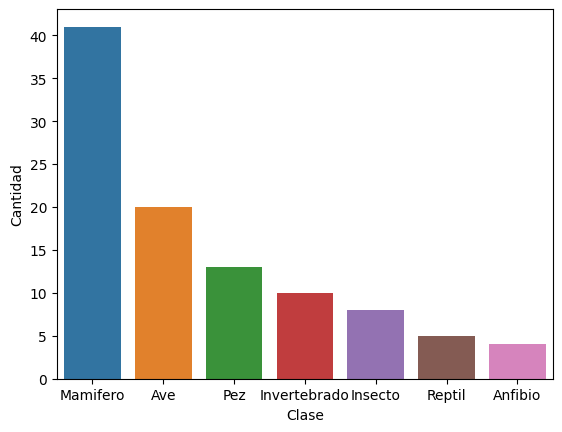

In [23]:
import seaborn as sns

df = pd.read_csv("csv/zoo.csv", encoding="latin1")


x = df["Clase"].value_counts().reset_index()
x.columns = ["Clase", "Cantidad"]

sns.barplot(data=x, x="Clase", y="Cantidad", hue="Clase")

Los problemas serian que hay muy poca representación de algunos grupos y se podria interpretar como ruido.

In [ ]:
p = Perceptron(alpha=0.1, n_iter=1000)
X = df.drop(columns=["animal", "Clase"]).astype(float).values
y = (df["Clase"] == "Mamifero").astype(int).values
p.fit(X, y)

print(np.array_equal(p.predict(X), y))

print(p.w_) # -> Esto coincide con nace en huevo (negativamente) y tiene pelo (positivamente) y toma leche(positivamente)

True
[ 0.91443819 -0.12813215 -1.12373402  0.75359549 -0.40716656 -0.08494994
 -0.26111675  0.21962242 -0.03505928  0.48273108  0.03303422 -0.18908891
 -0.15643559 -0.24468     0.16898175  0.57265653]


In [ ]:
p = Perceptron(alpha=0.1, n_iter=1000)
X = df.drop(columns=["animal", "Clase"]).astype(float).values
y = (df["Clase"] == "Reptil").astype(int).values
p.fit(X, y)

print(np.array_equal(p.predict(X), y))

print(p.w_) # -> Esto coincide con tiene pelo (negativamente) y tiene plumas (negativamente) y toma leche (negativamente) y vuela (negativamente)

True
[-1.6871869  -1.63771479  0.01717757 -1.06832341 -1.00817496 -1.10008649
 -0.2478641  -0.06377909  0.85989579 -0.20166761  0.49901963 -1.28719073
 -0.2108156   0.9633713   0.13462013  0.45036616]


In [ ]:
p = Perceptron(alpha=0.1, n_iter=1000)
X = df.drop(columns=["animal", "Clase"]).astype(float).values
y = (df["Clase"] == "Ave").astype(int).values
p.fit(X, y)

print(np.array_equal(p.predict(X), y))

print(p.w_) # -> Tiene plumas (positivamente)

True
[-0.31922023  0.74891771 -0.20864077 -0.46000357  0.2257137  -0.32574038
  0.1574954  -0.69302382  0.6628891   0.21163189 -0.30197596  0.38441846
 -0.3299319  -0.19098195  0.10139005  0.24603742]


# Ejercicio 7
El archivo automobile_simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una
versión modificada y simplificada del dataset disponible en el repositorio UCI
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los
atributos que contiene el archivo y caracterizan a cada vehículo.

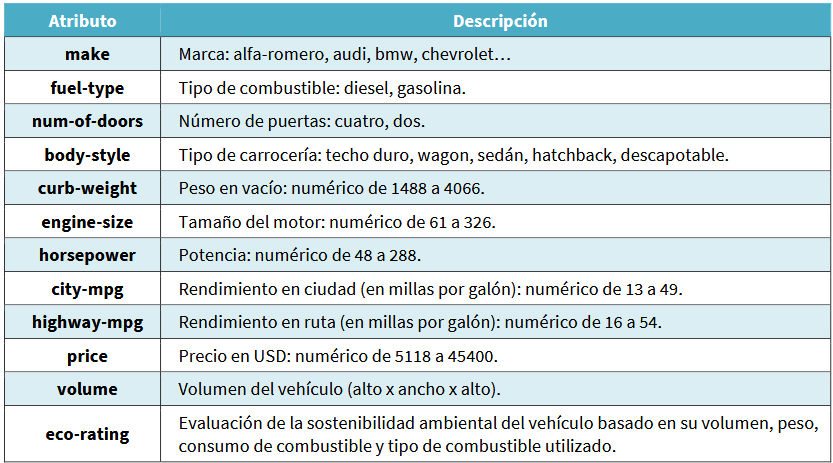

a) Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

b) Elimine los registros que presenten valores faltantes.

c) Calcule la matriz de correlación usando los atributos numéricos.

d) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga
en cuenta los siguientes pasos:

I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de
dicho atributo.

II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar,
normalización lineal, normalización estándar.

III. Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione
sobre los resultados obtenidos.

a) 
Atributos Nominales (categorías sin orden)

- make → Nominal (marca del auto, categorías sin orden).

- fuel-type → Nominal (diesel, gasolina, categorías sin jerarquía).

- body-style → Nominal (sedán, hatchback, wagon, etc.).

Atributos Ordinales (categorías con orden implícito)

- num-of-doors → Ordinal (dos puertas < cuatro puertas, existe un orden aunque limitado).

- eco-rating -> Ordinal

Atributos Continuos (valores numéricos en un rango real)

- curb-weight → Continuo (peso en vacío, numérico real entre 1488 y 4066).

- engine-size → Continuo (cilindrada, valores reales entre 61 y 326).

- horsepower → Continuo (potencia, valores entre 48 y 288).

- city-mpg → Continuo (rendimiento en ciudad, valores entre 13 y 49 mpg).

- highway-mpg → Continuo (rendimiento en ruta, valores entre 16 y 54 mpg).

- price → Continuo (precio en USD, 5118 a 45400, numérico real).

- volume → Continuo (alto × ancho × largo → valores continuos).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Perceptron

# ============================
# Paso I: Crear atributo binario eco-rating-binary
# ============================
df = pd.read_csv("csv/automobile-simple.csv")

# Eliminar nulos
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Crear el atributo binario
threshold = df["eco-rating"].mean()
df["eco-rating-binary"] = (df["eco-rating"] > threshold).astype(int)

# ============================
# Función auxiliar para entrenar perceptrón
# ============================
def entrenar_modelo(df, normalizacion=None, eliminar_corr=False):
    num_cols = ["curb-weight", "engine-size", "horsepower", 
                "city-mpg", "highway-mpg", "price", "volume"]
    cat_cols = ["make", "fuel-type", "body-style", "num-of-doors"]

    if eliminar_corr:
        num_cols = [c for c in num_cols if c not in ["city-mpg", "curb-weight"]]

    X_num = df[num_cols].values

    if normalizacion == "lineal":
        X_num = MinMaxScaler().fit_transform(X_num)
    elif normalizacion == "estandar":
        X_num = StandardScaler().fit_transform(X_num)

    encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
    X_cat = encoder.fit_transform(df[cat_cols])

    X = np.hstack([X_num, X_cat])
    y = df["eco-rating-binary"].values

    p = Perceptron(alpha=0.01, max_iter=500)
    p.fit(X, y)

    pred = p.predict(X)
    return np.mean(pred == y)

# ============================
# Paso II: Comparar normalizaciones
# ============================
acc_sin = entrenar_modelo(df, normalizacion=None)
acc_lin = entrenar_modelo(df, normalizacion="lineal")
acc_est = entrenar_modelo(df, normalizacion="estandar")

print("Accuracy sin normalizar:", acc_sin)
print("Accuracy normalización lineal:", acc_lin)
print("Accuracy normalización estándar:", acc_est)

# ============================
# Paso III: Eliminar atributos correlacionados y repetir
# ============================
acc_sin_corr = entrenar_modelo(df, normalizacion=None, eliminar_corr=True)
acc_lin_corr = entrenar_modelo(df, normalizacion="lineal", eliminar_corr=True)
acc_est_corr = entrenar_modelo(df, normalizacion="estandar", eliminar_corr=True)

print("\nCon atributos correlacionados eliminados:")
print("Accuracy sin normalizar:", acc_sin_corr)
print("Accuracy normalización lineal:", acc_lin_corr)
print("Accuracy normalización estándar:", acc_est_corr)



Matriz de correlación entre atributos numéricos:
             curb-weight  engine-size  horsepower  city-mpg  highway-mpg  \
curb-weight         1.00         0.85        0.75     -0.76        -0.80   
engine-size         0.85         1.00        0.81     -0.65        -0.68   
horsepower          0.75         0.81        1.00     -0.80        -0.77   
city-mpg           -0.76        -0.65       -0.80      1.00         0.97   
highway-mpg        -0.80        -0.68       -0.77      0.97         1.00   
price               0.83         0.87        0.81     -0.69        -0.70   
volume              0.82         0.59        0.43     -0.55        -0.60   
eco-rating         -0.84        -0.72       -0.82      0.98         0.98   

             price  volume  eco-rating  
curb-weight   0.83    0.82       -0.84  
engine-size   0.87    0.59       -0.72  
horsepower    0.81    0.43       -0.82  
city-mpg     -0.69   -0.55        0.98  
highway-mpg  -0.70   -0.60        0.98  
price         1.00 